In [1]:
import os
import glob
from functools import reduce

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Response rate

In [3]:
# wrr_rr_data = pd.read_csv('../../../../../results/results/timeseries/timeout-1sec/wrr/wrr_response_rate.csv', header=0, na_filter=False)
wlc_rr_data = pd.read_csv('../../../../../results/timeseries/timeout-1sec/time-varying/single-backend/100ms/wlc/wlc_response_rate.csv', header=0, na_filter=False)
fdb_wrr_rr_data = pd.read_csv('../../../../../results/timeseries/timeout-1sec/time-varying/single-backend/100ms/feedback-wrr/feedback_wrr_response_rate.csv', header=0, na_filter=False)
fdb_wlc_rr_data = pd.read_csv('../../../../../results/timeseries/timeout-1sec/time-varying/single-backend/100ms/feedback-wlc/feedback_wlc_response_rate.csv', header=0, na_filter=False)

In [4]:
rr_plot = pd.DataFrame()

rr_plot['percentiles'] = ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
                          'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
                          'Response rate 99%', 'Response rate 100%'] 

# wrr_rr_list = []
wlc_rr_list = []
fdb_wrr_rr_list = []
fdb_wlc_rr_list = []
for i in ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
          'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
          'Response rate 99%', 'Response rate 100%']:
#     wrr_rr_list.append(wrr_rr_data[i][0])
    wlc_rr_list.append(wlc_rr_data[i][0])
    fdb_wrr_rr_list.append(fdb_wrr_rr_data[i][0])
    fdb_wlc_rr_list.append(fdb_wlc_rr_data[i][0])
    
# rr_plot['wrr'] = wrr_rr_list
rr_plot['wlc'] = wlc_rr_list
rr_plot['feedback-wrr'] = fdb_wrr_rr_list
rr_plot['feedback-wlc'] = fdb_wlc_rr_list

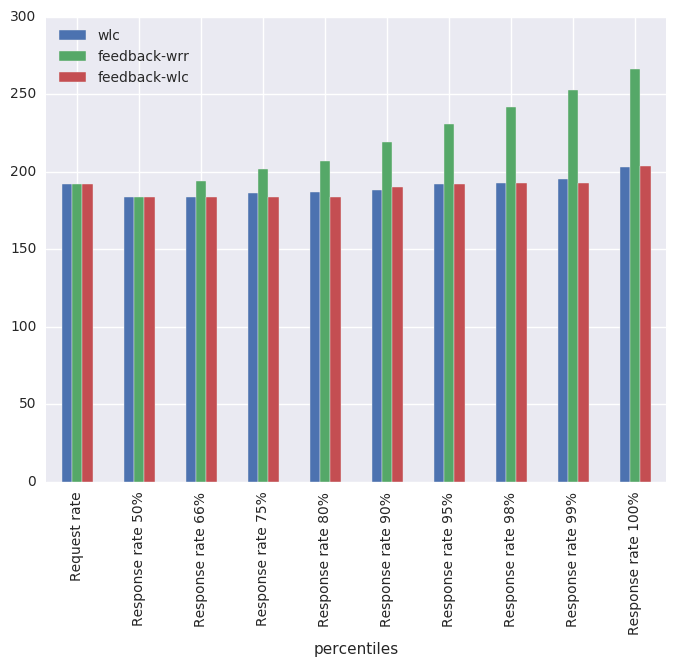

In [5]:
rr_plot.plot('percentiles', kind='bar')

## Response time

In [6]:
# wrr_rt_data = pd.read_csv('../../results/timeseries/timeout-1sec/wrr/wrr_response_time.csv', header=0, na_filter=False)
wlc_rt_data = pd.read_csv('../../../../../results/timeseries/timeout-1sec/time-varying/single-backend/100ms/wlc/wlc_response_time.csv', header=0, na_filter=False)
fdb_wrr_rt_data = pd.read_csv('../../../../../results/timeseries/timeout-1sec/time-varying/single-backend/100ms/feedback-wrr/feedback_wrr_response_time.csv', header=0, na_filter=False)
fdb_wlc_rt_data = pd.read_csv('../../../../../results/timeseries/timeout-1sec/time-varying/single-backend/100ms/feedback-wlc/feedback_wlc_response_time.csv', header=0, na_filter=False)

In [7]:
rt_plot = pd.DataFrame()

rt_plot['percentiles'] = ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
                          'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
                          'Response time 99%', 'Response time 100%'] 

# wrr_rt_list = []
wlc_rt_list = []
fdb_wrr_rt_list = []
fdb_wlc_rt_list = []
for i in ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
          'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
          'Response time 99%', 'Response time 100%']:
#     wrr_rt_list.append(wrr_rt_data[i][0])
    wlc_rt_list.append(wlc_rt_data[i][0])
    fdb_wrr_rt_list.append(fdb_wrr_rt_data[i][0])
    fdb_wlc_rt_list.append(fdb_wlc_rt_data[i][0])
    

rt_plot['wlc'] = wlc_rt_list
rt_plot['feedback-wrr'] = fdb_wrr_rt_list
rt_plot['feedback-wlc'] = fdb_wlc_rt_list

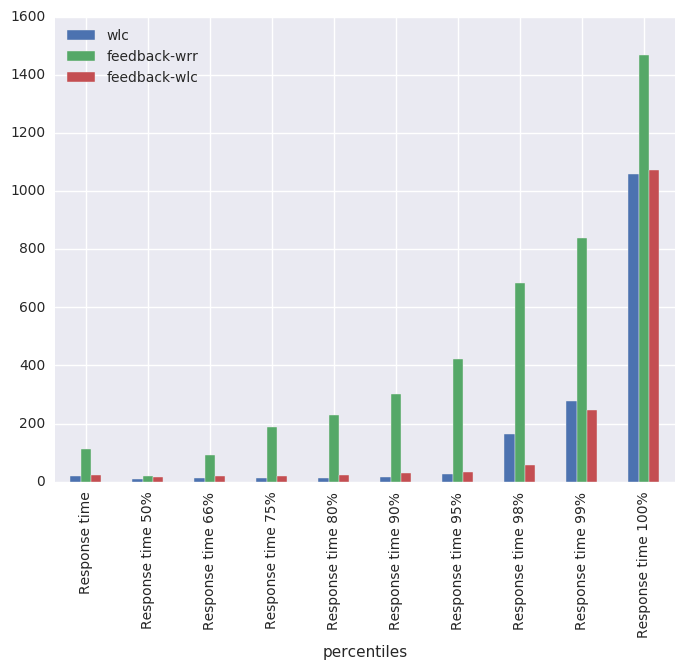

In [8]:
rt_plot.plot('percentiles', kind='bar')

* In the previous experiments, we had a static arrangement where a single backend server was consistently loaded. In this setup, we observed that WLC's lack of memory led to the the slow backend being selected over time (when the number of active connections to that server drops). This behavior of WLC reflected in the tail of the response times. However, feedback-wrr benefited from this arrangement by having the weight of the backend server be consistently lower than that of the faster servers.

* In the time-varying load experiment, a single backend server X exhibited a bimodal load distribution. Every T ms (with T=100 for now), X flips a coin to decide whether to be in the "overloaded" or "not overloaded" states. In this scenario, an ideal load balancer should exploit periods when backend servers are in the "not overloaded" state, and otherwise route requests away from a server. WLC performs better in this scenario than feedback-WRR because WLC can observe and correct its poor allocations (since it uses the number of outstanding active connections to rank servers). Feedback-WRR on the other hand relies solely on the weights being relayed by the feedback mechanism to route requests. The time-varying nature of the load on X causes X's weight to oscillate. Furthermore, feedbackd in our setup does not apply any smoothing to its weights. As the weights from all servers oscillate, there appear moments where X has a higher weight than the remaining servers, causing feedback-WRR to aggressively route requests to X (evidenced by the correlation of active connections spikes with spikes in the weights). This subsequently commits a high number of requests to X, degrading the response time distribution for the overall workload when using feedback-WRR.

* @Shahbaz: what about feedback-wlc?